# Data Preparation

In [1]:
# Mounting google drive ke google colabs #
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd /content/drive/MyDrive/Portfolio

/content/drive/MyDrive/Portfolio


In [3]:
# Import package #
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from sklearn.preprocessing import OrdinalEncoder

In [4]:
# Read file csv #
df = pd.read_csv('complaints.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
# Lookup the data overview #
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2022-05-01,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,15146.0,NaN,NaN,Web,2022-05-01,In progress,Yes,NaN,5522962
1,2022-04-20,Mortgage,FHA mortgage,Trouble during payment process,NaN,NaN,Company has responded to the consumer and the ...,M&T BANK CORPORATION,MD,20745.0,NaN,Consent not provided,Web,2022-04-20,Closed with explanation,Yes,NaN,5470311
2,2022-05-01,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",PA,15146.0,NaN,NaN,Web,2022-05-01,In progress,Yes,NaN,5523011
3,2022-05-01,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,15146.0,NaN,NaN,Web,2022-05-01,In progress,Yes,NaN,5523012
4,2022-05-01,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,78664.0,NaN,NaN,Web,2022-05-01,In progress,Yes,NaN,5523023


In [6]:
# Lookup all column and data type#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2645798 entries, 0 to 2645797
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 363.

# Data Cleansing and Manipulation

In [7]:
# Check data duplicate #
df.duplicated().sum()

0

In [8]:
# Because there's no data duplicate and all data field that will be used already clean, therefore continue#

#Change the type of date to be datetime64#
df["Date received"] = pd.to_datetime(df["Date received"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2645798 entries, 0 to 2645797
Data columns (total 18 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Date received                 datetime64[ns]
 1   Product                       object        
 2   Sub-product                   object        
 3   Issue                         object        
 4   Sub-issue                     object        
 5   Consumer complaint narrative  object        
 6   Company public response       object        
 7   Company                       object        
 8   State                         object        
 9   ZIP code                      object        
 10  Tags                          object        
 11  Consumer consent provided?    object        
 12  Submitted via                 object        
 13  Date sent to company          object        
 14  Company response to consumer  object        
 15  Timely response?              ob

In [10]:
# Changes the date to be month-year to easily sorting in graph#
df["Date received"].sort_values(ascending=False)

60133     2022-05-03
47737     2022-05-03
65330     2022-05-03
59438     2022-05-03
70617     2022-05-03
             ...    
681908    2011-12-01
1804020   2011-12-01
1019833   2011-12-01
768943    2011-12-01
1161156   2011-12-01
Name: Date received, Length: 2645798, dtype: datetime64[ns]

In [11]:
# filter the data with range of 01/01/2019 - 31/04/2022 #
df = df[(df['Date received'] > '2018-12-31') & (df['Date received'] < '2022-05-01')]
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
1,2022-04-20,Mortgage,FHA mortgage,Trouble during payment process,NaN,NaN,Company has responded to the consumer and the ...,M&T BANK CORPORATION,MD,20745.0,NaN,Consent not provided,Web,2022-04-20,Closed with explanation,Yes,NaN,5470311
5,2022-04-23,"Money transfer, virtual currency, or money ser...",Domestic (US) money transfer,Other transaction problem,NaN,NaN,NaN,JPMORGAN CHASE & CO.,IL,60453.0,Older American,NaN,Web,2022-04-23,Closed with monetary relief,Yes,NaN,5487123
7,2022-04-20,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Need information about your loan balance or lo...,NaN,NaN,AES/PHEAA,CO,80111.0,NaN,NaN,Web,2022-04-20,In progress,Yes,NaN,5473412
8,2022-04-15,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,NaN,NaN,UNITED SERVICES AUTOMOBILE ASSOCIATION,FL,32812.0,NaN,NaN,Referral,2022-04-18,In progress,Yes,NaN,5462556
9,2022-04-29,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"Fidelity National Information Services, Inc. (...",CA,92614.0,Servicemember,NaN,Web,2022-04-29,In progress,Yes,NaN,5519070


# Process the data

## Total Complaint Every Month-Year


In [12]:
# Grouping total complaint per month- year#
df['Date received'] = df['Date received'].dt.to_period('M')

monthly_data = (df
                .groupby('Date received')
                .agg(num_complaint=('Complaint ID','nunique'))
                .reset_index())

monthly_data['Date received'] = monthly_data['Date received'].astype(str) 
monthly_data.head()

,Date received,num_complaint
0,2019-01,18932
1,2019-02,20203
2,2019-03,23408
3,2019-04,22913
4,2019-05,23847


### Line Chart of Total Complaints Every Month - Year

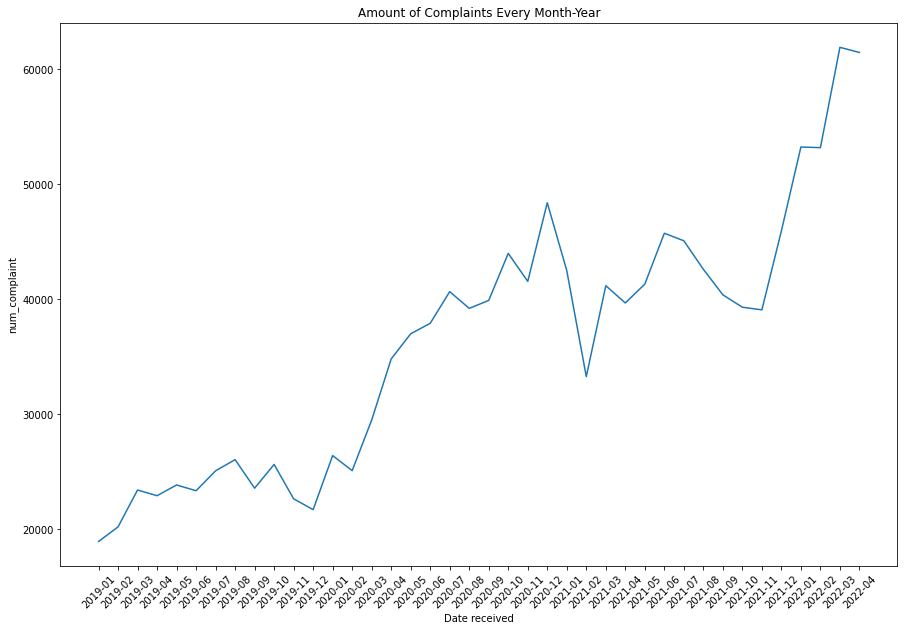

In [17]:
# Visualize growth of total complaint in each month-year#
plt.figure(figsize=(15,10)) # the size change to be bigger for seeing easily
sns.lineplot(data=monthly_data,
             x='Date received',
             y='num_complaint')
plt.xticks(rotation=45)
plt.title('Amount of Complaints Every Month-Year')
plt.show()

There's a significant increase of complaints every month- year from 01/2019 till 04/2022.

## Company Response to Customer

### Pie Chart of Percentages Company Response of All Complaints

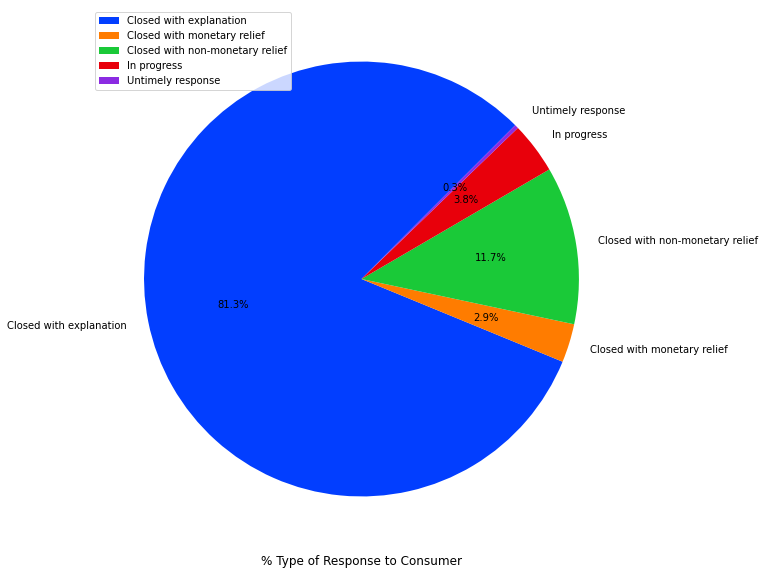

In [18]:
# Visualize company response of all complaints to the customer with the specified date#
df.groupby(['Company response to consumer']).sum().plot(kind='pie', subplots=True,startangle=45, figsize=(15,10), autopct='%1.1f%%', colors = sns.color_palette('bright')[0:18],textprops={'fontsize': 10})
plt.xlabel('% Type of Response to Consumer',fontsize= 12)
plt.ylabel('')
plt.legend(fontsize=10, loc = 'upper left')

There's only 3,8% complaints that still on status "In Progress", and 0,3% complaints of untimely response. The others of 95,9% of response is closed either with explanation (81,3%), with monetary relief (2,9%), or with non-monetary relief (11,7%) to the customers.

## Total Complaint per Product

In [19]:
# Grouping total complaints by the product#
Product_count = df.groupby(['Product'],as_index=False).size().sort_values(['size'],ascending=False).astype({'size':'int'})
Product_count

,Product,size
2,"Credit reporting, credit repair services, or o...",896407
3,Debt collection,191743
1,Credit card or prepaid card,103302
0,Checking or savings account,87096
5,Mortgage,82216
4,"Money transfer, virtual currency, or money ser...",31101
8,Vehicle loan or lease,22925
7,Student loan,17939
6,"Payday loan, title loan, or personal loan",14723


### Bar Chart of Total Complaints per Product

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


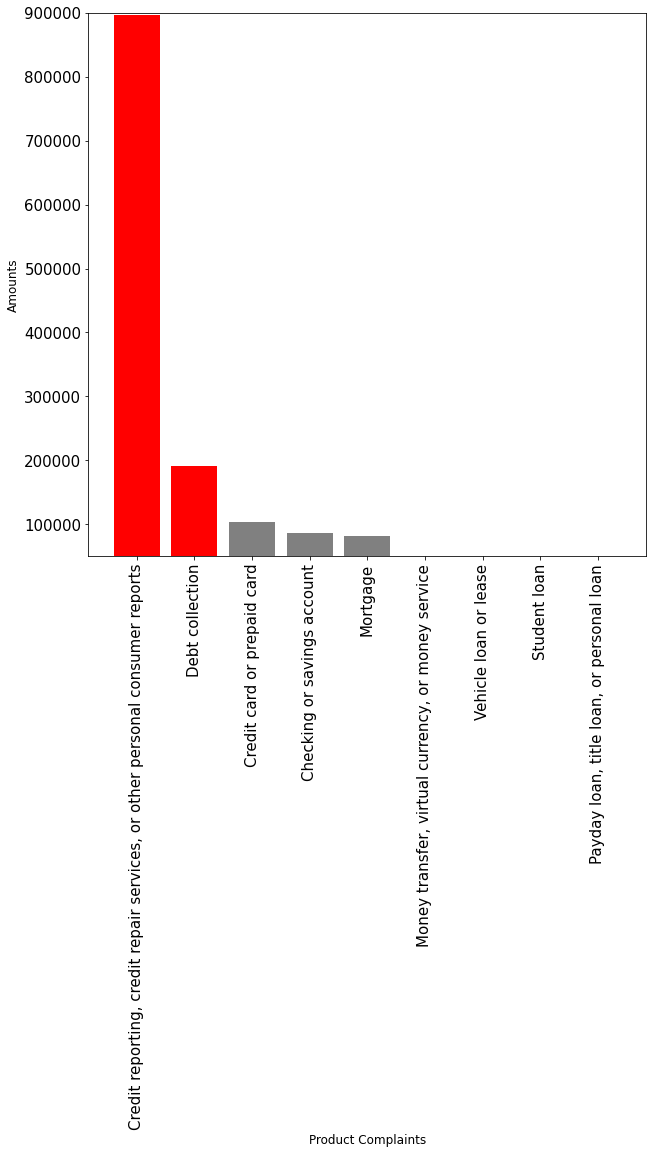

In [21]:
# Create barchart of product complaints based on the amount #
plt.figure(figsize=(10,10))
product_x = Product_count['Product']
productsize_y = Product_count['size']
sns.barplot(product_x,productsize_y)

#Naming chart and labels #
plt.xlabel('Product Complaints',fontsize= 12)
plt.ylabel('Amounts', fontsize=12)

#Formating barchart #
colors = ['r' if (bar > (Product_count['size']).mean()) else 'grey' for bar in Product_count['size']]
plt.bar(product_x, productsize_y, color=colors ) 
plt.xticks(rotation=90, fontsize=15)
plt.yticks (fontsize=15)
plt.ylim(50000,900000)
plt.show()

From the bar chart, there are "Credit reporting, credit repair services, or other personal consumer reports" and 
"Debt collection" that have amount more than the average of total amount of all complaints.

### Pie Chart of Percentages of Total Complaints per Product

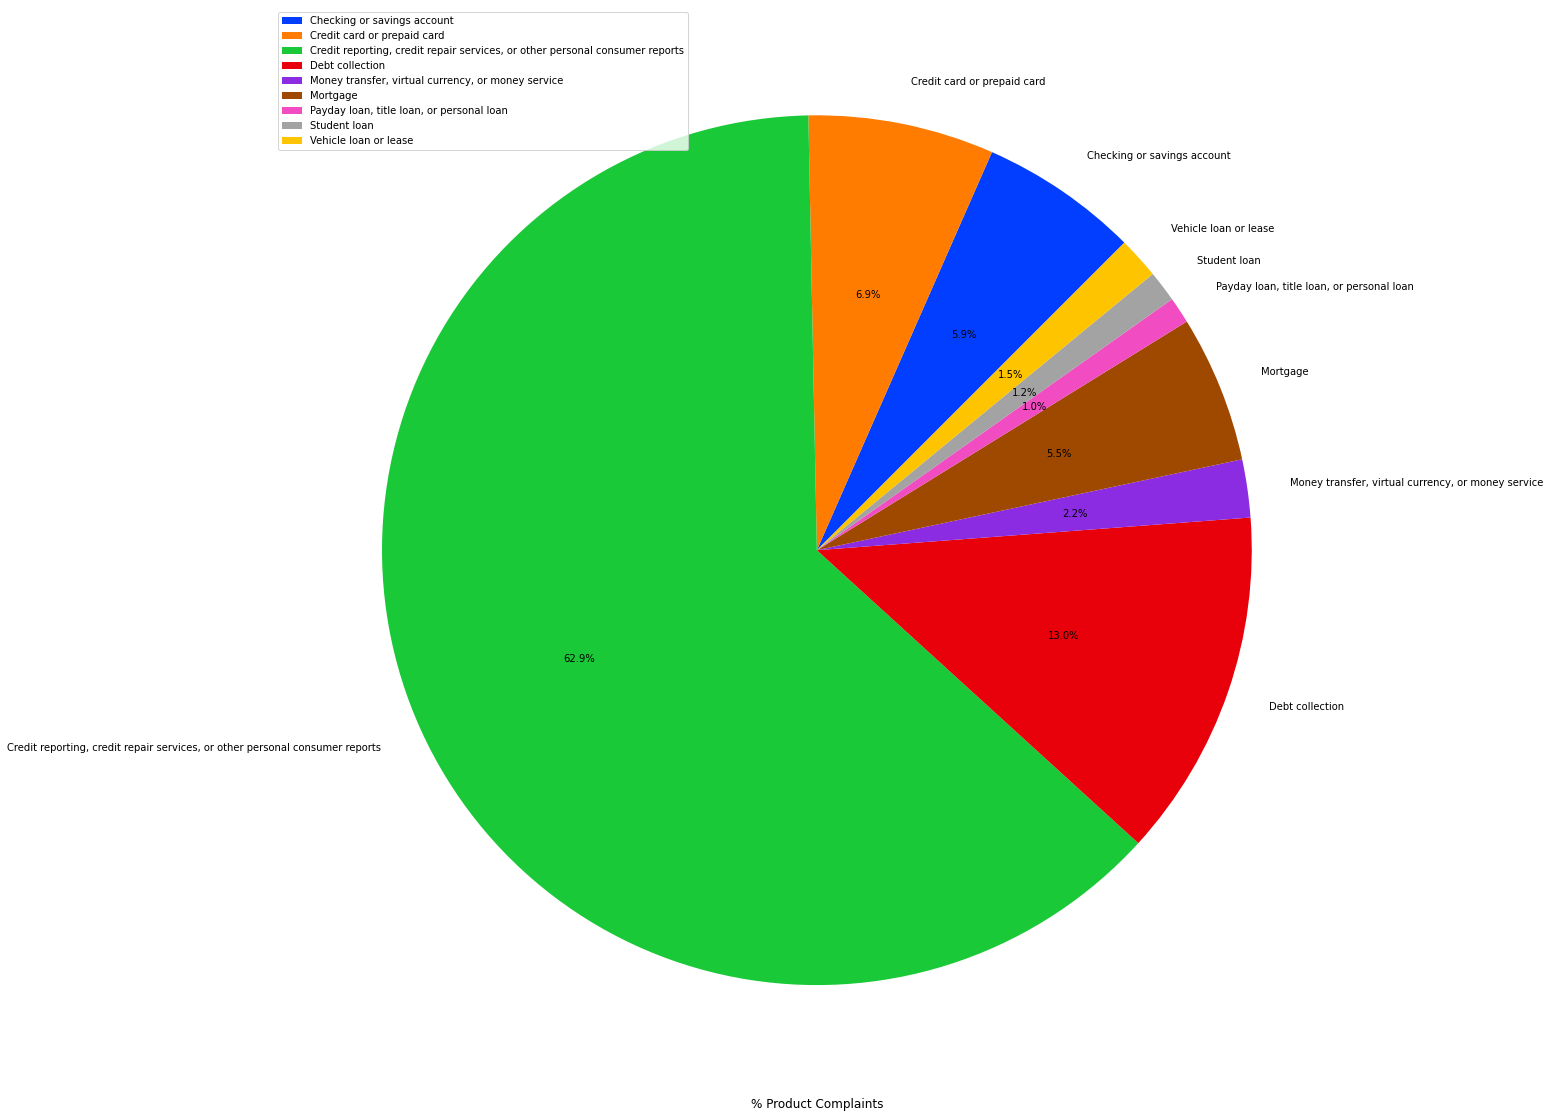

In [ ]:
df.groupby(['Product']).sum().plot(kind='pie', subplots=True,startangle=45, figsize=(20,20), autopct='%1.1f%%', colors = sns.color_palette('bright')[0:18],textprops={'fontsize': 10}, legend='upper left')
plt.xlabel('% Product Complaints',fontsize= 12)
plt.ylabel('')
plt.legend(fontsize=10, loc='upper left')

The largest amount of complaint per product is "Credit reporting, credit repair services, or other personal consumer reports" with the percentage 62,9% than the others.

##Growth of Complain Product

In [22]:
# Grouping product complaints in every month-year#
monthly_complaint = (df
                .groupby(['Date received','Product'])
                .agg(Product_complaint=('Complaint ID','nunique'))
                .reset_index())

monthly_complaint['Date received'] = monthly_complaint['Date received'].astype(str) 
monthly_complaint

,Date received,Product,Product_complaint
0,2019-01,Checking or savings account,1795
1,2019-01,Credit card or prepaid card,1905
2,2019-01,"Credit reporting, credit repair services, or o...",8514
3,2019-01,Debt collection,3127
4,2019-01,"Money transfer, virtual currency, or money ser...",344
...,...,...,...
355,2022-04,"Money transfer, virtual currency, or money ser...",803
356,2022-04,Mortgage,1432
357,2022-04,"Payday loan, title loan, or personal loan",340
358,2022-04,Student loan,383


In [23]:
# Define all of the product grouping #
monthly_report =  monthly_complaint[(monthly_complaint['Product'] == 'Credit reporting, credit repair services, or other personal consumer reports')]
monthly_checking =  monthly_complaint[(monthly_complaint['Product'] == 'Checking or savings account')]
monthly_cc =  monthly_complaint[(monthly_complaint['Product'] == 'Credit card or prepaid card')]
monthly_debt =  monthly_complaint[(monthly_complaint['Product'] == 'Debt collection')]
monthly_transfer =  monthly_complaint[(monthly_complaint['Product'] == 'Money transfer, virtual currency, or money service')]
monthly_mortgage =  monthly_complaint[(monthly_complaint['Product'] == 'Mortgage')]
monthly_payday =  monthly_complaint[(monthly_complaint['Product'] == 'Payday loan, title loan, or personal loan')]
monthly_student =  monthly_complaint[(monthly_complaint['Product'] == 'Student loan')]
monthly_vehicle =  monthly_complaint[(monthly_complaint['Product'] == 'Vehicle loan or lease')]

### Line Chart of Total Complaint per Product in Every Month-Year

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 <a list of 40 Text major ticklabel objects>)

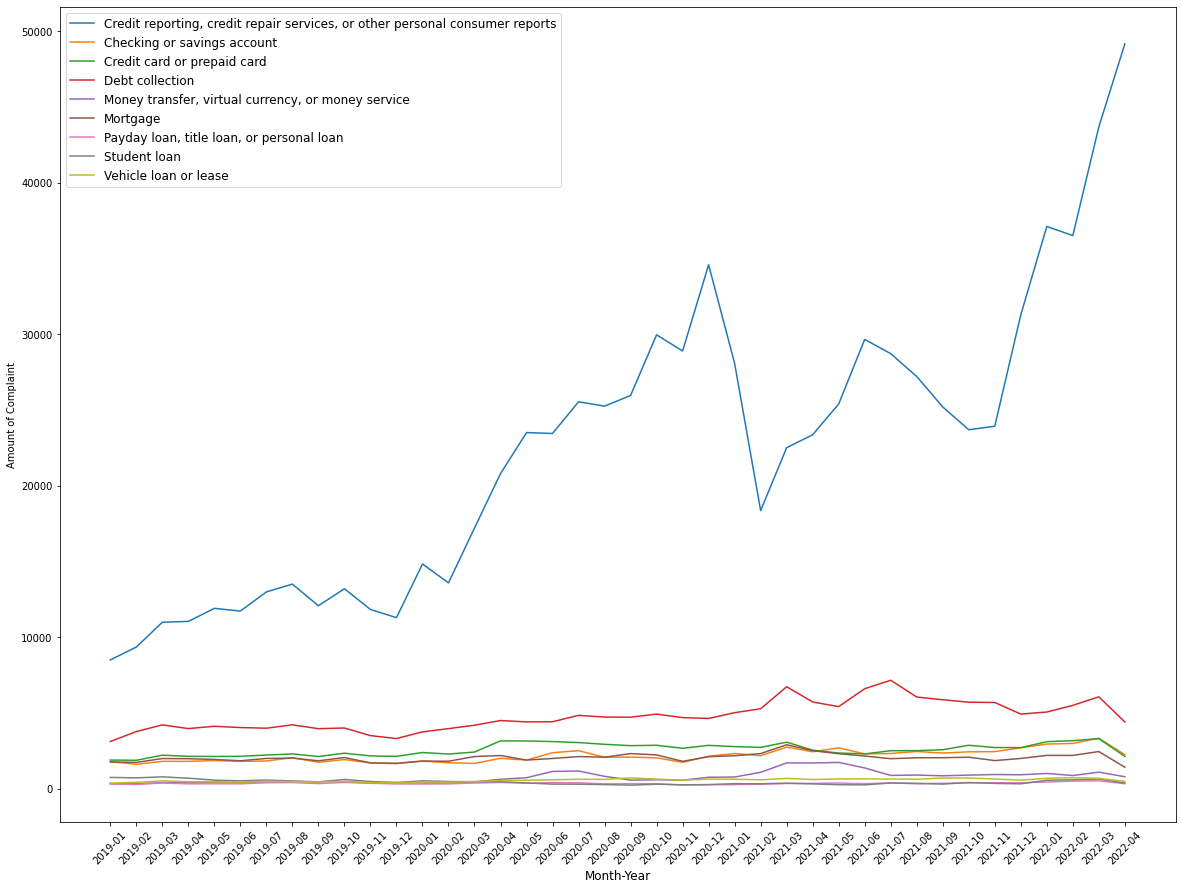

In [24]:
# Visualize complaint in every month-year using line chart #
fig, ax = plt.subplots(1,1,figsize=(20,15))

ax.plot(monthly_report['Date received'], monthly_report['Product_complaint'], label= 'Credit reporting, credit repair services, or other personal consumer reports')
ax.plot(monthly_checking['Date received'], monthly_checking['Product_complaint'], label= 'Checking or savings account')
ax.plot(monthly_cc['Date received'], monthly_cc['Product_complaint'], label = 'Credit card or prepaid card')
ax.plot(monthly_debt['Date received'], monthly_debt['Product_complaint'], label = 'Debt collection')
ax.plot(monthly_transfer['Date received'], monthly_transfer['Product_complaint'], label = 'Money transfer, virtual currency, or money service')
ax.plot(monthly_mortgage['Date received'], monthly_mortgage['Product_complaint'], label = 'Mortgage')
ax.plot(monthly_payday['Date received'], monthly_payday['Product_complaint'], label = 'Payday loan, title loan, or personal loan')
ax.plot(monthly_student['Date received'], monthly_student['Product_complaint'], label = 'Student loan')
ax.plot(monthly_vehicle['Date received'], monthly_vehicle['Product_complaint'], label = 'Vehicle loan or lease')


plt.xlabel('Month-Year',fontsize= 12)
plt.ylabel('Amount of Complaint')
plt.legend (fontsize=12, loc ='upper left')
plt.xticks(rotation=45)

There's significant increase and amount of complaint for product "Credit reporting, credit repair services, or other personal consumer reports" than the others every month-year from 01/2019 till 04/2022.

# Deep-dive analysis of the data from the largest complaints

## Credit reporting, credit repair services, or other personal consumer reports

In [28]:
# filtering the data of complaint with product Credit reporting, credit repair services, or other personal consumer reports#
df_1 = df[(df['Product'] == 'Credit reporting, credit repair services, or other personal consumer reports')]
df_1

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
9,2022-04,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"Fidelity National Information Services, Inc. (...",CA,92614.0,Servicemember,NaN,Web,2022-04-29,In progress,Yes,NaN,5519070
11,2022-04,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,MI,48326.0,NaN,Consent not provided,Web,2022-04-24,Closed with non-monetary relief,Yes,NaN,5490053
14,2022-02,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,12919.0,NaN,Consent not provided,Web,2022-02-02,Closed with non-monetary relief,Yes,NaN,5177559
15,2022-03,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",WA,98056.0,NaN,NaN,Web,2022-03-14,Closed with explanation,Yes,NaN,5321616
18,2022-03,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,I have been a Kohls credit card holder for ove...,NaN,CAPITAL ONE FINANCIAL CORPORATION,IL,60015.0,NaN,Consent provided,Web,2022-03-04,Closed with non-monetary relief,Yes,NaN,5286409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639923,2021-08,"Credit reporting, credit repair services, or o...",Credit reporting,Credit monitoring or identity theft protection...,Problem canceling credit monitoring or identif...,NaN,NaN,"EQUIFAX, INC.",TX,75010.0,NaN,Consent not provided,Web,2021-08-30,Closed with explanation,Yes,NaN,4672014
2639925,2021-11,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN,NaN,"EQUIFAX, INC.",TX,77084.0,NaN,Consent not provided,Web,2021-11-02,Closed with explanation,Yes,NaN,4866098
2639926,2022-01,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",AL,36106.0,NaN,Consent not provided,Web,2022-01-07,Closed with explanation,Yes,NaN,5083052
2639930,2021-11,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",SC,29172.0,NaN,Consent not provided,Web,2021-11-20,Closed with explanation,Yes,NaN,4932499


## Issue of Credit reporting, credit repair services, or other personal consumer reports

In [29]:
#Grouping The data Credit reporting, credit repair services, or other personal consumer reports based on issue#
Issue_credit_count = df_1.groupby(['Issue'],as_index=False).size().sort_values(['size'],ascending=False).astype({'size':'int'})
Issue_credit_count

,Issue,size
15,Incorrect information on your report,516864
17,Problem with a credit reporting company's inve...,254944
14,Improper use of your report,93024
22,Unable to get your credit report or credit score,13662
19,Problem with fraud alerts or security freezes,7788
3,Credit monitoring or identity theft protection...,6283
16,Problem with a company's investigation into an...,1442
7,Fraud or scam,805
13,Identity theft protection or other monitoring ...,450
18,Problem with customer service,354


### Bar Chart of each issue in product Credit reporting, credit repair services, or other personal consumer reports

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


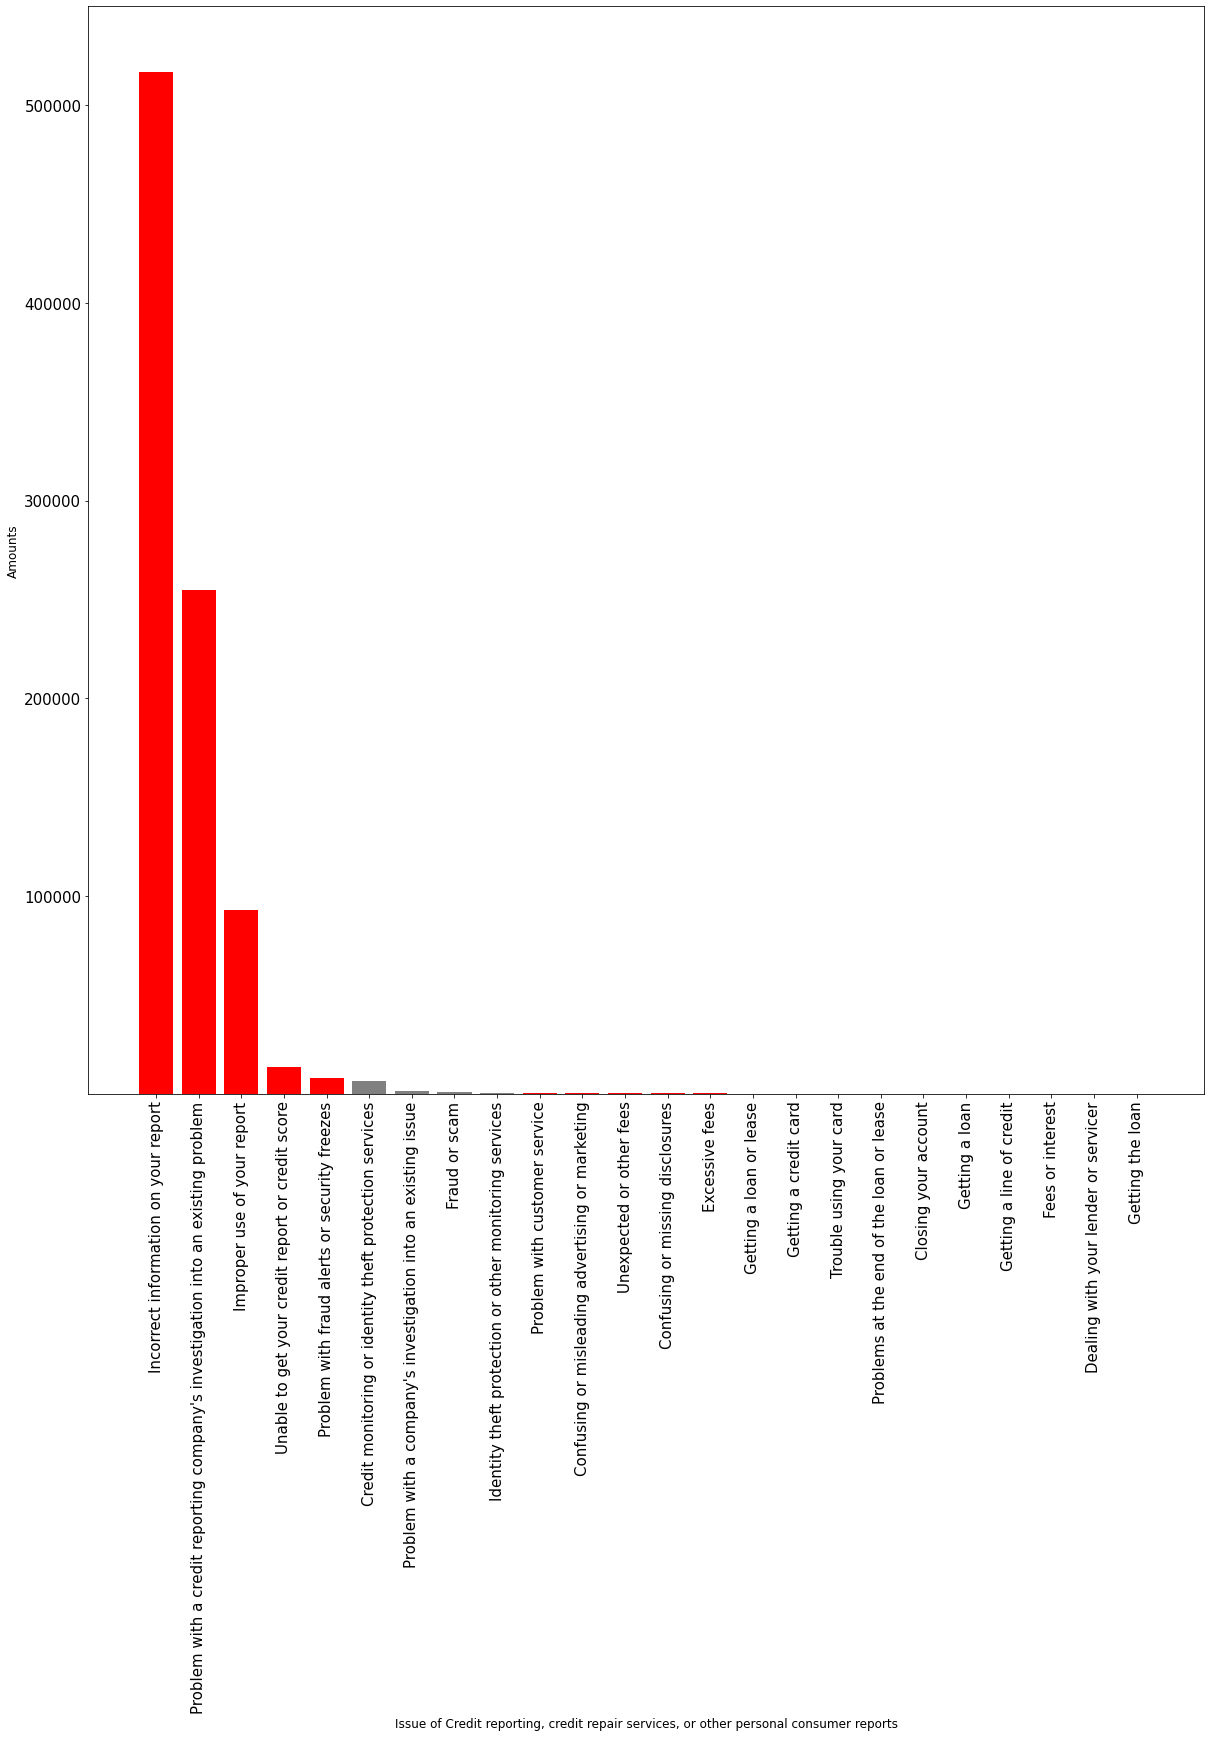

In [30]:
# Create barchart of issue based on the amount #
plt.figure(figsize=(20,20))
issue_credit_x = Issue_credit_count['Issue']
issue_credit_size_y = Issue_credit_count['size']
sns.barplot(issue_credit_x,issue_credit_size_y)

#Naming chart and labels #

plt.xlabel('Issue of Credit reporting, credit repair services, or other personal consumer reports',fontsize= 12)
plt.ylabel('Amounts', fontsize=12)

#Formating barchart #
colors = ['r' if (bar > (Issue_credit_count['size']).mean()) else 'grey' for bar in Product_count['size']]
plt.bar(issue_credit_x,issue_credit_size_y, color=colors ) 
plt.xticks(rotation=90, fontsize=15)
plt.yticks (fontsize=15)
plt.ylim(50,550000)
plt.show()

There's TOP 5 ISSUE of complaints in the product of "Credit reporting, credit repair services, or other personal consumer reports" which have amount more than the average of the issue.


1.   Incorrect information on your report
2.   Problem with a credit reporting company's investigation into an existing problem
3. Improper use of your report
4. Unable to get your credit report or credit score
5. Problem with fraud alerts or security freezes

Because there's significant amount of issue "Incorrect information on your report", so will analyze more about 'sub-issue of Incorrect information on your report'



## Sub-Issue of Issue "Incorrect Information on your report" of product "Credit reporting, credit repair services, or other personal consumer reports"

In [31]:
df_2 = df_1[(df_1['Issue'] == 'Incorrect information on your report')]
df_2

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
9,2022-04,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"Fidelity National Information Services, Inc. (...",CA,92614.0,Servicemember,NaN,Web,2022-04-29,In progress,Yes,NaN,5519070
15,2022-03,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",WA,98056.0,NaN,NaN,Web,2022-03-14,Closed with explanation,Yes,NaN,5321616
18,2022-03,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,I have been a Kohls credit card holder for ove...,NaN,CAPITAL ONE FINANCIAL CORPORATION,IL,60015.0,NaN,Consent provided,Web,2022-03-04,Closed with non-monetary relief,Yes,NaN,5286409
19,2022-02,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,Hi the reasoning for this dispute is the follo...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33324.0,NaN,Consent provided,Web,2022-02-03,Closed with non-monetary relief,Yes,NaN,5180838
23,2022-03,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",PA,19132.0,NaN,NaN,Web,2022-03-14,Closed with explanation,Yes,NaN,5312292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639913,2021-10,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",AL,35442.0,NaN,Consent not provided,Web,2021-10-21,Closed with explanation,Yes,NaN,4831539
2639921,2021-10,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",TN,37013.0,NaN,Consent not provided,Web,2021-10-20,Closed with explanation,Yes,NaN,4825715
2639926,2022-01,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",AL,36106.0,NaN,Consent not provided,Web,2022-01-07,Closed with explanation,Yes,NaN,5083052
2639930,2021-11,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",SC,29172.0,NaN,Consent not provided,Web,2021-11-20,Closed with explanation,Yes,NaN,4932499


In [32]:
# Grouping sub-issue of issue Incorrect information on your repor#
Incorrect_info_count = df_2.groupby(['Sub-issue'],as_index=False).size().sort_values(['size'],ascending=False).astype({'size':'int'})
Incorrect_info_count

,Sub-issue,size
2,Information belongs to someone else,360262
1,Account status incorrect,50171
0,Account information incorrect,49869
7,Personal information incorrect,29041
8,Public record information inaccurate,9995
6,Old information reappears or never goes away,9713
4,Information is missing that should be on the r...,6499
3,Information is incorrect,812
5,Information that should be on the report is mi...,501


### Bar chart of sub-issue in issue Incorrect information on your report#

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


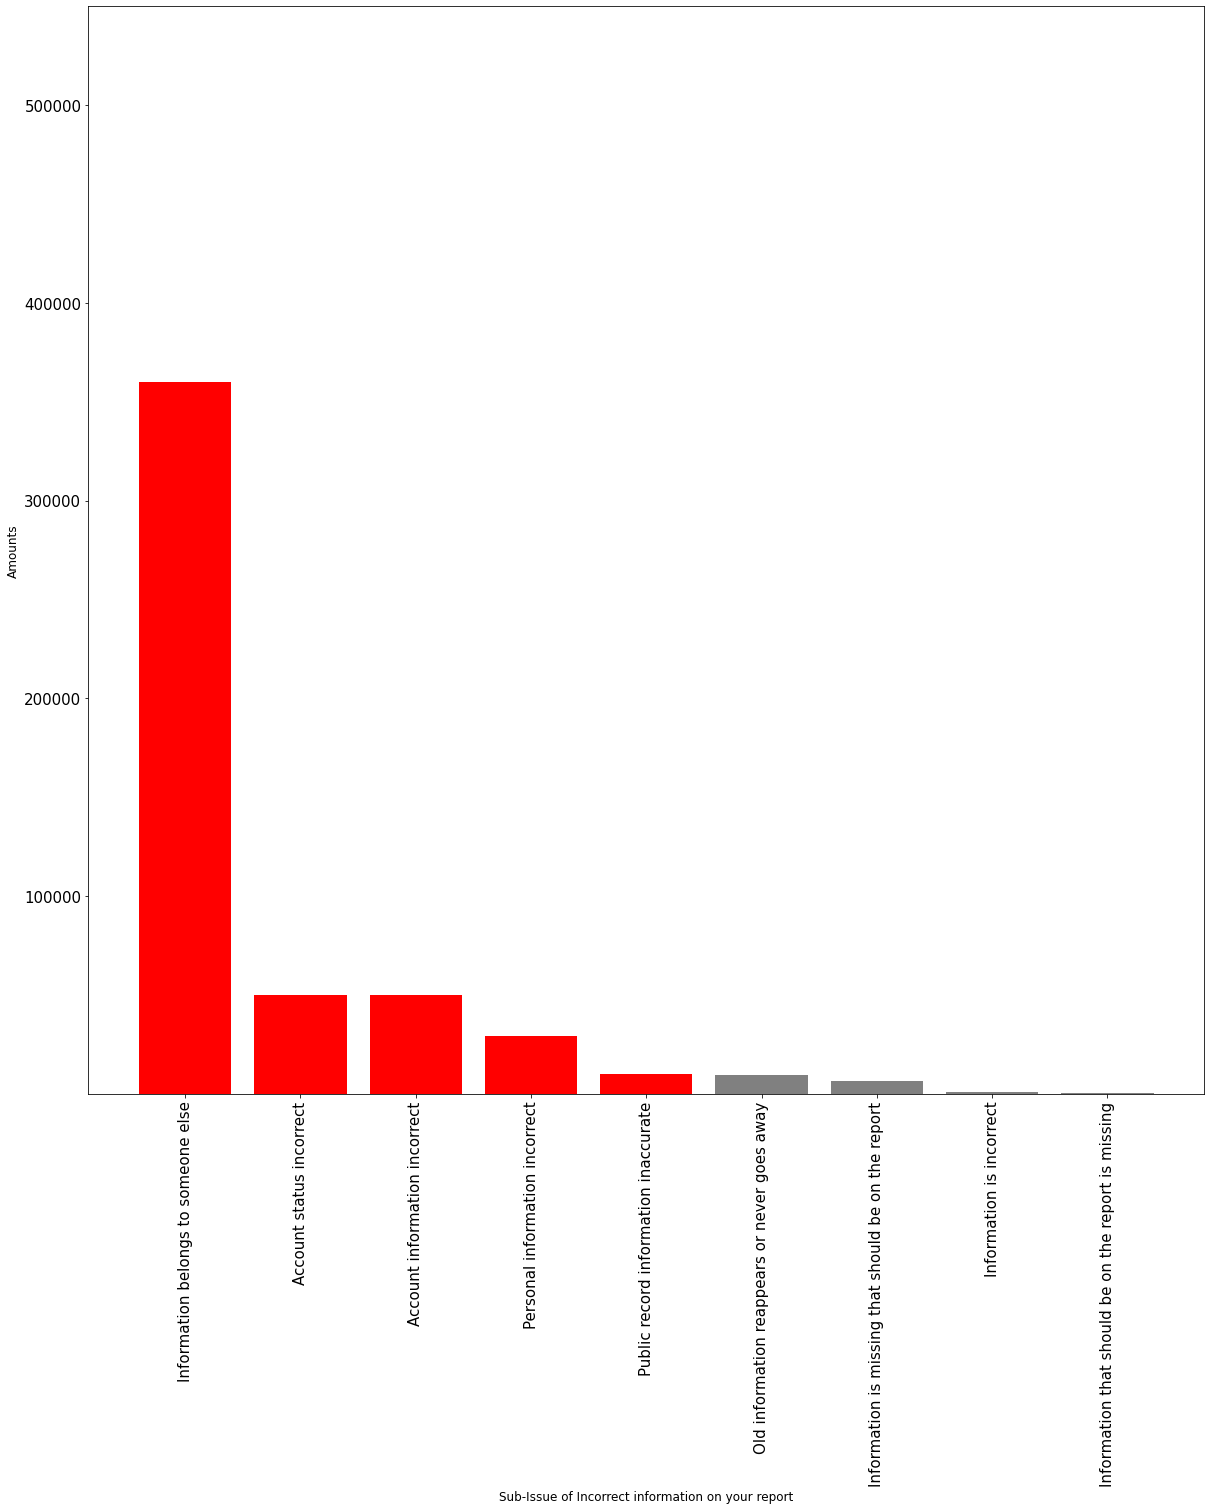

In [ ]:
# Create barchart of product complaints based on the amount #
plt.figure(figsize=(20,20))
Incorrect_info_x = Incorrect_info_count['Sub-issue']
Incorrect_info_size_y = Incorrect_info_count['size']
sns.barplot(Incorrect_info_x,Incorrect_info_size_y)

#Naming chart and labels #

plt.xlabel('Sub-Issue of Incorrect information on your report',fontsize= 12)
plt.ylabel('Amounts', fontsize=12)

#Formating barchart #
colors = ['r' if (bar > (Incorrect_info_count['size']).mean()) else 'grey' for bar in Product_count['size']]
plt.bar(Incorrect_info_x ,Incorrect_info_size_y, color=colors ) 
plt.xticks(rotation=90, fontsize=15)
plt.yticks (fontsize=15)
plt.ylim(50,550000)
plt.show()

There's TOP 5 ISSUE of complaints in the issue of "Incorrect information on your report" on product "Credit reporting, credit repair services, or other personal consumer reports" which have amount more than the average of the issue.

1. Information belongs to someone else
2. Account status incorrect
3. Account information incorrect
4. Personal information incorrect
5. Public record information inaccurate